In [1]:
import tensorflow as tf

C:\Users\0107w\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
samples = X_train[:25]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
%matplotlib inline

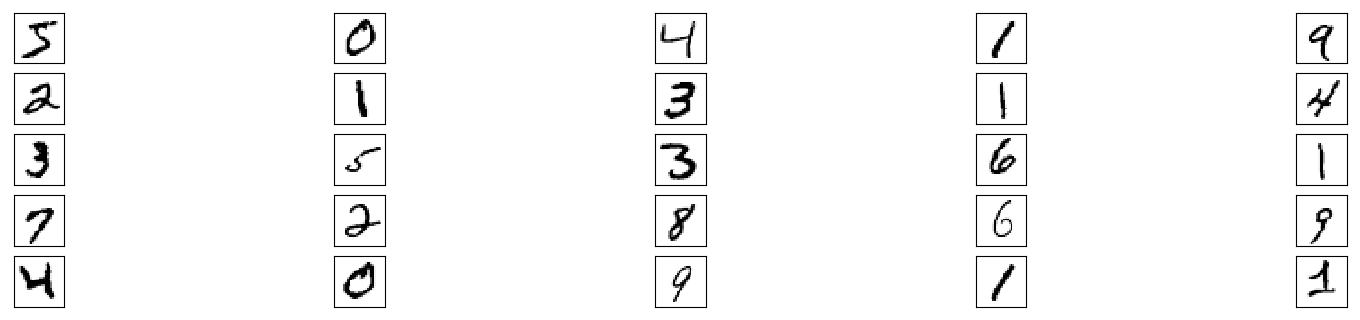

In [8]:
fig = plt.figure(figsize=(20, 20), dpi=100)
for index, sample in enumerate(samples, 1):
    fig.add_subplot(np.ceil(len(samples / 5)) , 5, index, xticks=[], yticks=[])
    plt.imshow(sample, cmap="Greys", aspect="equal")

In [9]:
learning_rate = 0.001
training_epochs = 50
batch_size = 100

In [10]:
n_classes = 10
n_samples = len(X_train)

In [11]:
# Flatten input data and scale each values to be in [0, 1] interval
X_train = np.divide(X_train.reshape(X_train.shape[0], -1), 255)
X_test = np.divide(X_test.reshape(X_test.shape[0], -1), 255)
# Transform labels into one-hot vectors
y_train = np.eye(n_classes)[y_train]
y_test = np.eye(n_classes)[y_test]

In [12]:
n_input = X_train.shape[1]

In [13]:
n_hidden_1 = 256
n_hidden_2 = 256

In [14]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : placeholder for data input
    weights : dict of weights
    biases : dict of bias values
    '''
    
    # First Hidden Layer with ReLU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    # ReLU(X * W + B) -> f(x) = max(0, x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['h2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Output Layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [15]:
weights = {
    'h1':tf.Variable(tf.random_normal((n_input, n_hidden_1))),
    'h2':tf.Variable(tf.random_normal((n_hidden_1, n_hidden_2))),
    'out':tf.Variable(tf.random_normal((n_hidden_2, n_classes)))
}

In [16]:
biases = {
    'h1':tf.Variable(tf.random_normal((n_hidden_1,))),
    'h2':tf.Variable(tf.random_normal((n_hidden_2,))),
    'out':tf.Variable(tf.random_normal((n_classes,)))
}

In [17]:
x = tf.placeholder('float', [None, n_input])

In [18]:
y = tf.placeholder('float', [None, n_classes])

In [19]:
pred = multilayer_perceptron(x, weights, biases)

In [20]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [21]:
sess = tf.InteractiveSession()

In [22]:
init = tf.global_variables_initializer()

In [23]:
sess.run(init)

In [24]:
# Training Session
for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.0
    
    total_batch = n_samples // batch_size
    
    for i in range(total_batch):
        batch_x = X_train[i * batch_size:(i + 1) * batch_size]
        batch_y = y_train[i * batch_size:(i + 1) * batch_size]
        
        __, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
    
    print("Epoch: {} Cost: {:.4f}".format(epoch + 1, avg_cost))

print("Model has completed {} epochs of training".format(training_epochs))

Epoch: 1 Cost: 156.8769
Epoch: 2 Cost: 39.6721
Epoch: 3 Cost: 25.0874
Epoch: 4 Cost: 17.5548
Epoch: 5 Cost: 12.7462
Epoch: 6 Cost: 9.3918
Epoch: 7 Cost: 6.8942
Epoch: 8 Cost: 5.1175
Epoch: 9 Cost: 3.8568
Epoch: 10 Cost: 2.9027
Epoch: 11 Cost: 2.1859
Epoch: 12 Cost: 1.5852
Epoch: 13 Cost: 1.2159
Epoch: 14 Cost: 0.9883
Epoch: 15 Cost: 0.8440
Epoch: 16 Cost: 0.7268
Epoch: 17 Cost: 0.6161
Epoch: 18 Cost: 0.5235
Epoch: 19 Cost: 0.5840
Epoch: 20 Cost: 0.4280
Epoch: 21 Cost: 0.3670
Epoch: 22 Cost: 0.4535
Epoch: 23 Cost: 0.3668
Epoch: 24 Cost: 0.3526
Epoch: 25 Cost: 0.2972
Epoch: 26 Cost: 0.3036
Epoch: 27 Cost: 0.2704
Epoch: 28 Cost: 0.2964
Epoch: 29 Cost: 0.3278
Epoch: 30 Cost: 0.2702
Epoch: 31 Cost: 0.2433
Epoch: 32 Cost: 0.2441
Epoch: 33 Cost: 0.2692
Epoch: 34 Cost: 0.2336
Epoch: 35 Cost: 0.2123
Epoch: 36 Cost: 0.2291
Epoch: 37 Cost: 0.1909
Epoch: 38 Cost: 0.2690
Epoch: 39 Cost: 0.1766
Epoch: 40 Cost: 0.2063
Epoch: 41 Cost: 0.2115
Epoch: 42 Cost: 0.1835
Epoch: 43 Cost: 0.1945
Epoch: 44 Cost

In [25]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [26]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [27]:
accuracy = tf.reduce_mean(correct_predictions)

In [28]:
accuracy.eval({x:X_test, y:y_test})

0.9636